In [1]:

# imports
import os
import sys
import types
import json
import base64

# figure size/format
fig_width = 7
fig_height = 5
fig_format = 'retina'
fig_dpi = 96
interactivity = ''
is_shiny = False
is_dashboard = False
plotly_connected = True

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = "figure"

  # IPython 7.14 deprecated set_matplotlib_formats from IPython
  try:
    from matplotlib_inline.backend_inline import set_matplotlib_formats
  except ImportError:
    # Fall back to deprecated location for older IPython versions
    from IPython.display import set_matplotlib_formats
    
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  if plotly_connected:
    pio.renderers.default = "notebook_connected"
  else:
    pio.renderers.default = "notebook"
  for template in pio.templates.keys():
    pio.templates[template].layout.margin = dict(t=30,r=0,b=0,l=0)
except Exception:
  pass

# disable itables paging for dashboards
if is_dashboard:
  try:
    from itables import options
    options.dom = 'fiBrtlp'
    options.maxBytes = 1024 * 1024
    options.language = dict(info = "Showing _TOTAL_ entries")
    options.classes = "display nowrap compact"
    options.paging = False
    options.searching = True
    options.ordering = True
    options.info = True
    options.lengthChange = False
    options.autoWidth = False
    options.responsive = True
    options.keys = True
    options.buttons = []
  except Exception:
    pass
  
  try:
    import altair as alt
    # By default, dashboards will have container sized
    # vega visualizations which allows them to flow reasonably
    theme_sentinel = '_quarto-dashboard-internal'
    def make_theme(name):
        nonTheme = alt.themes._plugins[name]    
        def patch_theme(*args, **kwargs):
            existingTheme = nonTheme()
            if 'height' not in existingTheme:
              existingTheme['height'] = 'container'
            if 'width' not in existingTheme:
              existingTheme['width'] = 'container'

            if 'config' not in existingTheme:
              existingTheme['config'] = dict()
            
            # Configure the default font sizes
            title_font_size = 15
            header_font_size = 13
            axis_font_size = 12
            legend_font_size = 12
            mark_font_size = 12
            tooltip = False

            config = existingTheme['config']

            # The Axis
            if 'axis' not in config:
              config['axis'] = dict()
            axis = config['axis']
            if 'labelFontSize' not in axis:
              axis['labelFontSize'] = axis_font_size
            if 'titleFontSize' not in axis:
              axis['titleFontSize'] = axis_font_size  

            # The legend
            if 'legend' not in config:
              config['legend'] = dict()
            legend = config['legend']
            if 'labelFontSize' not in legend:
              legend['labelFontSize'] = legend_font_size
            if 'titleFontSize' not in legend:
              legend['titleFontSize'] = legend_font_size  

            # The header
            if 'header' not in config:
              config['header'] = dict()
            header = config['header']
            if 'labelFontSize' not in header:
              header['labelFontSize'] = header_font_size
            if 'titleFontSize' not in header:
              header['titleFontSize'] = header_font_size    

            # Title
            if 'title' not in config:
              config['title'] = dict()
            title = config['title']
            if 'fontSize' not in title:
              title['fontSize'] = title_font_size

            # Marks
            if 'mark' not in config:
              config['mark'] = dict()
            mark = config['mark']
            if 'fontSize' not in mark:
              mark['fontSize'] = mark_font_size

            # Mark tooltips
            if tooltip and 'tooltip' not in mark:
              mark['tooltip'] = dict(content="encoding")

            return existingTheme
            
        return patch_theme

    # We can only do this once per session
    if theme_sentinel not in alt.themes.names():
      for name in alt.themes.names():
        alt.themes.register(name, make_theme(name))
      
      # register a sentinel theme so we only do this once
      alt.themes.register(theme_sentinel, make_theme('default'))
      alt.themes.enable('default')

  except Exception:
    pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass

# interactivity
if interactivity:
  from IPython.core.interactiveshell import InteractiveShell
  InteractiveShell.ast_node_interactivity = interactivity

# NOTE: the kernel_deps code is repeated in the cleanup.py file
# (we can't easily share this code b/c of the way it is run).
# If you edit this code also edit the same code in cleanup.py!

# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
run_path = 'L2hvbWUvbWlrZW5ndXllbi9wcm9qZWN0L3RpZHlmaW5hbmNl'
if run_path:
  # hex-decode the path
  run_path = base64.b64decode(run_path.encode("utf-8")).decode("utf-8")
  os.chdir(run_path)

# reset state
%reset

# shiny
# Checking for shiny by using False directly because we're after the %reset. We don't want
# to set a variable that stays in global scope.
if False:
  try:
    import htmltools as _htmltools
    import ast as _ast

    _htmltools.html_dependency_render_mode = "json"

    # This decorator will be added to all function definitions
    def _display_if_has_repr_html(x):
      try:
        # IPython 7.14 preferred import
        from IPython.display import display, HTML
      except:
        from IPython.core.display import display, HTML

      if hasattr(x, '_repr_html_'):
        display(HTML(x._repr_html_()))
      return x

    # ideally we would undo the call to ast_transformers.append
    # at the end of this block whenver an error occurs, we do 
    # this for now as it will only be a problem if the user 
    # switches from shiny to not-shiny mode (and even then likely
    # won't matter)
    import builtins
    builtins._display_if_has_repr_html = _display_if_has_repr_html

    class _FunctionDefReprHtml(_ast.NodeTransformer):
      def visit_FunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

      def visit_AsyncFunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

    ip = get_ipython()
    ip.ast_transformers.append(_FunctionDefReprHtml())

  except:
    pass

def ojs_define(**kwargs):
  import json
  try:
    # IPython 7.14 preferred import
    from IPython.display import display, HTML
  except:
    from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v

  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define
globals()["__spec__"] = None

{"/opt/anaconda3/lib/python3.13/importlib/_bootstrap.py": 1749745530.584952, "/opt/anaconda3/lib/python3.13/importlib/_bootstrap_external.py": 1749745530.5809522, "/opt/anaconda3/lib/python3.13/zipimport.py": 1749745530.2849557, "/opt/anaconda3/lib/python3.13/codecs.py": 1749745530.164957, "/opt/anaconda3/lib/python3.13/encodings/aliases.py": 1749745530.3809545, "/opt/anaconda3/lib/python3.13/encodings/__init__.py": 1749745530.428954, "/opt/anaconda3/lib/python3.13/encodings/utf_8.py": 1749745530.4809532, "/opt/anaconda3/lib/python3.13/abc.py": 1749745530.1569571, "/opt/anaconda3/lib/python3.13/io.py": 1749745530.2049568, "/opt/anaconda3/lib/python3.13/stat.py": 1749745530.256956, "/opt/anaconda3/lib/python3.13/_collections_abc.py": 1749745530.168957, "/opt/anaconda3/lib/python3.13/genericpath.py": 1749745530.1929567, "/opt/anaconda3/lib/python3.13/posixpath.py": 1749745530.2289565, "/opt/anaconda3/lib/python3.13/os.py": 1749745530.2209566, "/opt/anaconda3/lib/python3.13/_sitebuiltins.

In [2]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf

from plotnine import *
from mizani.formatters import percent_format, comma_format
from itertools import product

In [3]:
import sqlite3

tidy_finance = sqlite3.connect(database="data/tidy_finance_python.sqlite")

comp_vn = pd.read_sql_query(
    sql="SELECT * FROM comp_vn",
    con=tidy_finance,
    parse_dates={"date"}
)

# Filter to FPT and examine the data structure
fpt_data = comp_vn[comp_vn["symbol"] == "FPT"].copy()
fpt_data["year"] = fpt_data["year"].astype(int)
fpt_data = fpt_data.sort_values("year").reset_index(drop=True)

print(f"Available years: {fpt_data['year'].min()} to {fpt_data['year'].max()}")
print(f"Number of observations: {len(fpt_data)}")

Available years: 2002 to 2023
Number of observations: 22


In [4]:
# Extract and compute FCF components
historical_data = (fpt_data
    .assign(
        # Revenue for ratio calculations
        revenue=lambda x: x["is_net_revenue"],
        
        # EBIT = Earnings before interest and taxes
        # Approximate as EBT + Interest Expense
        ebit=lambda x: x["is_ebt"] + x["is_interest_expense"],
        
        # Tax payments (use actual tax expense)
        taxes=lambda x: x["is_cit_expense"],
        
        # Depreciation and amortization (non-cash add-back)
        depreciation=lambda x: x["cfo_depreciation"],
        
        # Change in working capital components
        # Positive delta_wc means cash is consumed (tied up in working capital)
        delta_working_capital=lambda x: (
            x["cfo_receive"] +      # Change in receivables
            x["cfo_inventory"] -    # Change in inventory  
            x["cfo_payale"]         # Change in payables (negative = cash source)
        ),
        
        # Capital expenditures
        capex=lambda x: x["capex"]
    )
    .loc[:, [
        "year", "revenue", "ebit", "taxes", "depreciation",
        "delta_working_capital", "capex"
    ]]
)

# Calculate Free Cash Flow
historical_data["fcf"] = (
    historical_data["ebit"] 
    - historical_data["taxes"]
    + historical_data["depreciation"]
    - historical_data["delta_working_capital"]
    - historical_data["capex"]
)

historical_data

,year,revenue,ebit,taxes,depreciation,delta_working_capital,capex,fcf
0,2002,1.514961e+12,2.698700e+10,0.000000e+00,1.261500e+10,-2.561760e+11,2.202800e+10,2.737500e+11
1,2003,4.148298e+12,5.676100e+10,0.000000e+00,1.837700e+10,-5.078740e+11,3.753300e+10,5.454790e+11
2,2004,8.734781e+12,2.145902e+11,1.795700e+10,2.947900e+10,-4.280270e+11,5.252100e+10,6.016182e+11
3,2005,1.410079e+13,3.753490e+11,4.251500e+10,5.381700e+10,-4.471110e+11,1.428320e+11,6.909300e+11
4,2006,2.139975e+13,6.672593e+11,7.368682e+10,1.068192e+11,-1.173099e+12,2.459780e+11,1.627513e+12
5,2007,1.349889e+13,1.071941e+12,1.487146e+11,1.709335e+11,-1.873794e+12,4.802762e+11,2.487677e+12
6,2008,1.638184e+13,1.320573e+12,1.890384e+11,2.395799e+11,-1.419506e+11,6.690461e+11,8.440192e+11
7,2009,1.840403e+13,1.807221e+12,2.916482e+11,3.041813e+11,-8.065011e+11,7.632280e+11,1.863027e+12
8,2010,2.001730e+13,2.261341e+12,3.314359e+11,3.294060e+11,-2.360993e+12,8.672138e+11,3.753090e+12
9,2011,2.537025e+13,2.751044e+12,4.223952e+11,3.759567e+11,-2.099380e+12,4.524081e+11,4.351578e+12


In [5]:
# Calculate key ratios relative to revenue
historical_ratios = (historical_data
    .assign(
        # Revenue growth (year-over-year)
        revenue_growth=lambda x: x["revenue"].pct_change(),
        
        # Operating margin: EBIT as % of revenue
        operating_margin=lambda x: x["ebit"] / x["revenue"],
        
        # Depreciation as % of revenue
        depreciation_margin=lambda x: x["depreciation"] / x["revenue"],
        
        # Tax rate (taxes as % of revenue, for simplicity)
        tax_margin=lambda x: x["taxes"] / x["revenue"],
        
        # Working capital intensity
        working_capital_margin=lambda x: x["delta_working_capital"] / x["revenue"],
        
        # Capital intensity
        capex_margin=lambda x: x["capex"] / x["revenue"],
        
        # FCF margin
        fcf_margin=lambda x: x["fcf"] / x["revenue"]
    )
)

# Display key metrics
display_cols = [
    "year", "revenue_growth", "operating_margin", "depreciation_margin",
    "tax_margin", "working_capital_margin", "capex_margin", "fcf_margin"
]

historical_ratios[display_cols].round(3)

,year,revenue_growth,operating_margin,depreciation_margin,tax_margin,working_capital_margin,capex_margin,fcf_margin
0,2002,NaN,0.018,0.008,0.000,-0.169,0.015,0.181
1,2003,1.738,0.014,0.004,0.000,-0.122,0.009,0.131
2,2004,1.106,0.025,0.003,0.002,-0.049,0.006,0.069
3,2005,0.614,0.027,0.004,0.003,-0.032,0.010,0.049
4,2006,0.518,0.031,0.005,0.003,-0.055,0.011,0.076
5,2007,-0.369,0.079,0.013,0.011,-0.139,0.036,0.184
6,2008,0.214,0.081,0.015,0.012,-0.009,0.041,0.052
7,2009,0.123,0.098,0.017,0.016,-0.044,0.041,0.101
8,2010,0.088,0.113,0.016,0.017,-0.118,0.043,0.187
9,2011,0.267,0.108,0.015,0.017,-0.083,0.018,0.172


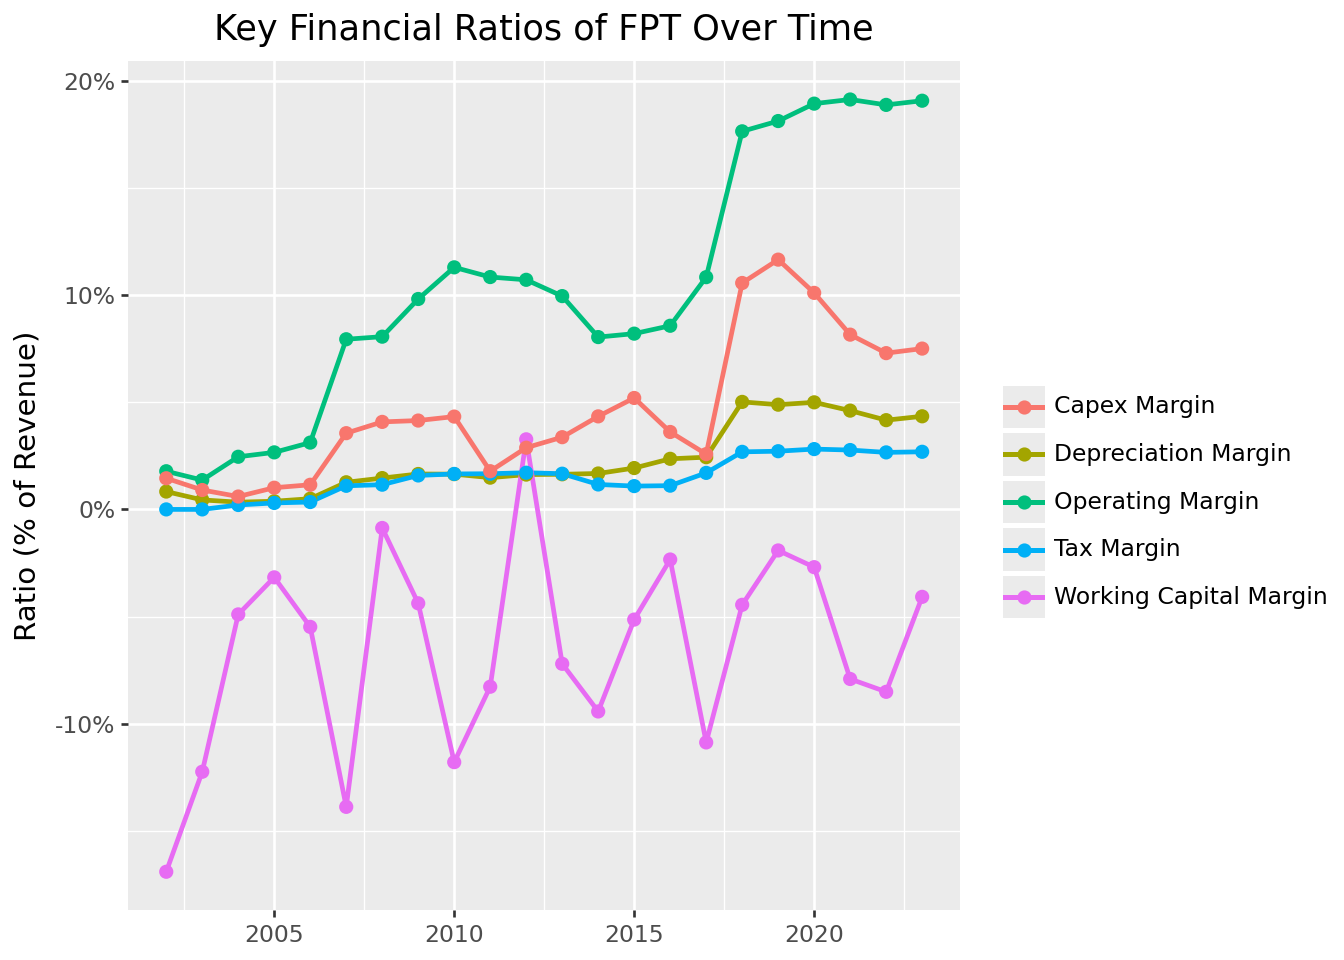

In [6]:
#| label: fig-500
#| fig-cap: Historical financial ratios reveal the operating characteristics of FPT. These patterns inform our forecast assumptions.
#| fig-alt: 'Title: Key financial ratios of FPT over time. The figure shows a line chart with years on the horizontal axis and financial ratios on the vertical axis.'

# Prepare data for plotting
ratio_columns = [
    "operating_margin", "depreciation_margin", "tax_margin",
    "working_capital_margin", "capex_margin"
]

ratios_long = (historical_ratios
    .melt(
        id_vars=["year"],
        value_vars=ratio_columns,
        var_name="ratio",
        value_name="value"
    )
    .assign(
        ratio=lambda x: x["ratio"].str.replace("_", " ").str.title()
    )
)

ratios_figure = (
    ggplot(ratios_long, aes(x="year", y="value", color="ratio"))
    + geom_line(size=1)
    + geom_point(size=2)
    + scale_y_continuous(labels=percent_format())
    + labs(
        x="", y="Ratio (% of Revenue)", color="",
        title="Key Financial Ratios of FPT Over Time"
    )
    + theme(legend_position="right")
)

ratios_figure.show()

In [7]:
# Define the forecast horizon
last_historical_year = historical_data["year"].max()
forecast_years = list(range(last_historical_year + 1, last_historical_year + 6))
n_forecast_years = len(forecast_years)

print(f"Forecast period: {forecast_years[0]} to {forecast_years[-1]}")

# Define forecast ratios
# In practice, these would come from detailed analysis
forecast_assumptions = pd.DataFrame({
    "year": forecast_years,
    # Operating margin: slight improvement as scale increases
    "operating_margin": [0.12, 0.125, 0.13, 0.13, 0.135],
    # Depreciation: stable as % of revenue
    "depreciation_margin": [0.03, 0.03, 0.03, 0.028, 0.028],
    # Tax rate: stable
    "tax_margin": [0.02, 0.02, 0.02, 0.02, 0.02],
    # Working capital: modest cash consumption
    "working_capital_margin": [0.01, 0.01, 0.008, 0.008, 0.008],
    # CAPEX: declining as % of revenue as growth moderates
    "capex_margin": [0.05, 0.048, 0.045, 0.042, 0.04]
})

forecast_assumptions

Forecast period: 2024 to 2028


,year,operating_margin,depreciation_margin,tax_margin,working_capital_margin,capex_margin
0,2024,0.120,0.030,0.02,0.010,0.050
1,2025,0.125,0.030,0.02,0.010,0.048
2,2026,0.130,0.030,0.02,0.008,0.045
3,2027,0.130,0.028,0.02,0.008,0.042
4,2028,0.135,0.028,0.02,0.008,0.040


In [8]:
historical_growth = historical_ratios["revenue_growth"].dropna()
avg_historical_growth = historical_growth.mean()

print(f"Average historical revenue growth: {avg_historical_growth:.1%}")

Average historical revenue growth: 25.2%


In [9]:
# Vietnam GDP growth forecasts (illustrative, based on IMF WEO style projections)
# In practice, download from IMF WEO database
gdp_forecasts = pd.DataFrame({
    "year": forecast_years,
    "gdp_growth": [0.065, 0.063, 0.060, 0.058, 0.055]  # Gradually declining to long-term
})

# Assume FPT grows at a premium to GDP (tech sector outperformance)
# This premium should reflect company-specific factors
growth_premium = 0.05  # 5 percentage points above GDP

forecast_assumptions = forecast_assumptions.merge(gdp_forecasts, on="year")
forecast_assumptions["revenue_growth"] = (
    forecast_assumptions["gdp_growth"] + growth_premium
)

forecast_assumptions[["year", "gdp_growth", "revenue_growth"]]

,year,gdp_growth,revenue_growth
0,2024,0.065,0.115
1,2025,0.063,0.113
2,2026,0.060,0.110
3,2027,0.058,0.108
4,2028,0.055,0.105


In [10]:
# Get the last historical revenue as our starting point
last_revenue = historical_data.loc[
    historical_data["year"] == last_historical_year, "revenue"
].values[0]

print(f"Last historical revenue ({last_historical_year}): {last_revenue/1e12:.2f} trillion VND")

# Project revenue forward
forecast_data = forecast_assumptions.copy()
forecast_data["revenue"] = None

# Calculate revenue for each forecast year
for i, row in forecast_data.iterrows():
    if i == 0:
        # First forecast year: grow from last historical
        forecast_data.loc[i, "revenue"] = last_revenue * (1 + row["revenue_growth"])
    else:
        # Subsequent years: grow from previous forecast
        prev_revenue = forecast_data.loc[i-1, "revenue"]
        forecast_data.loc[i, "revenue"] = prev_revenue * (1 + row["revenue_growth"])

# Convert revenue to numeric
forecast_data["revenue"] = forecast_data["revenue"].astype(float)

# Calculate FCF components from ratios
forecast_data["ebit"] = forecast_data["operating_margin"] * forecast_data["revenue"]
forecast_data["depreciation"] = forecast_data["depreciation_margin"] * forecast_data["revenue"]
forecast_data["taxes"] = forecast_data["tax_margin"] * forecast_data["revenue"]
forecast_data["delta_working_capital"] = forecast_data["working_capital_margin"] * forecast_data["revenue"]
forecast_data["capex"] = forecast_data["capex_margin"] * forecast_data["revenue"]

# Calculate FCF
forecast_data["fcf"] = (
    forecast_data["ebit"]
    - forecast_data["taxes"]
    + forecast_data["depreciation"]
    - forecast_data["delta_working_capital"]
    - forecast_data["capex"]
)

forecast_data[["year", "revenue", "ebit", "fcf"]].round(0)

Last historical revenue (2023): 52.62 trillion VND


,year,revenue,ebit,fcf
0,2024,5.866896e+13,7.040275e+12,4.106827e+12
1,2025,6.529855e+13,8.162319e+12,5.027988e+12
2,2026,7.248139e+13,9.422581e+12,6.305881e+12
3,2027,8.030938e+13,1.044022e+13,7.067226e+12
4,2028,8.874187e+13,1.198015e+13,8.430477e+12


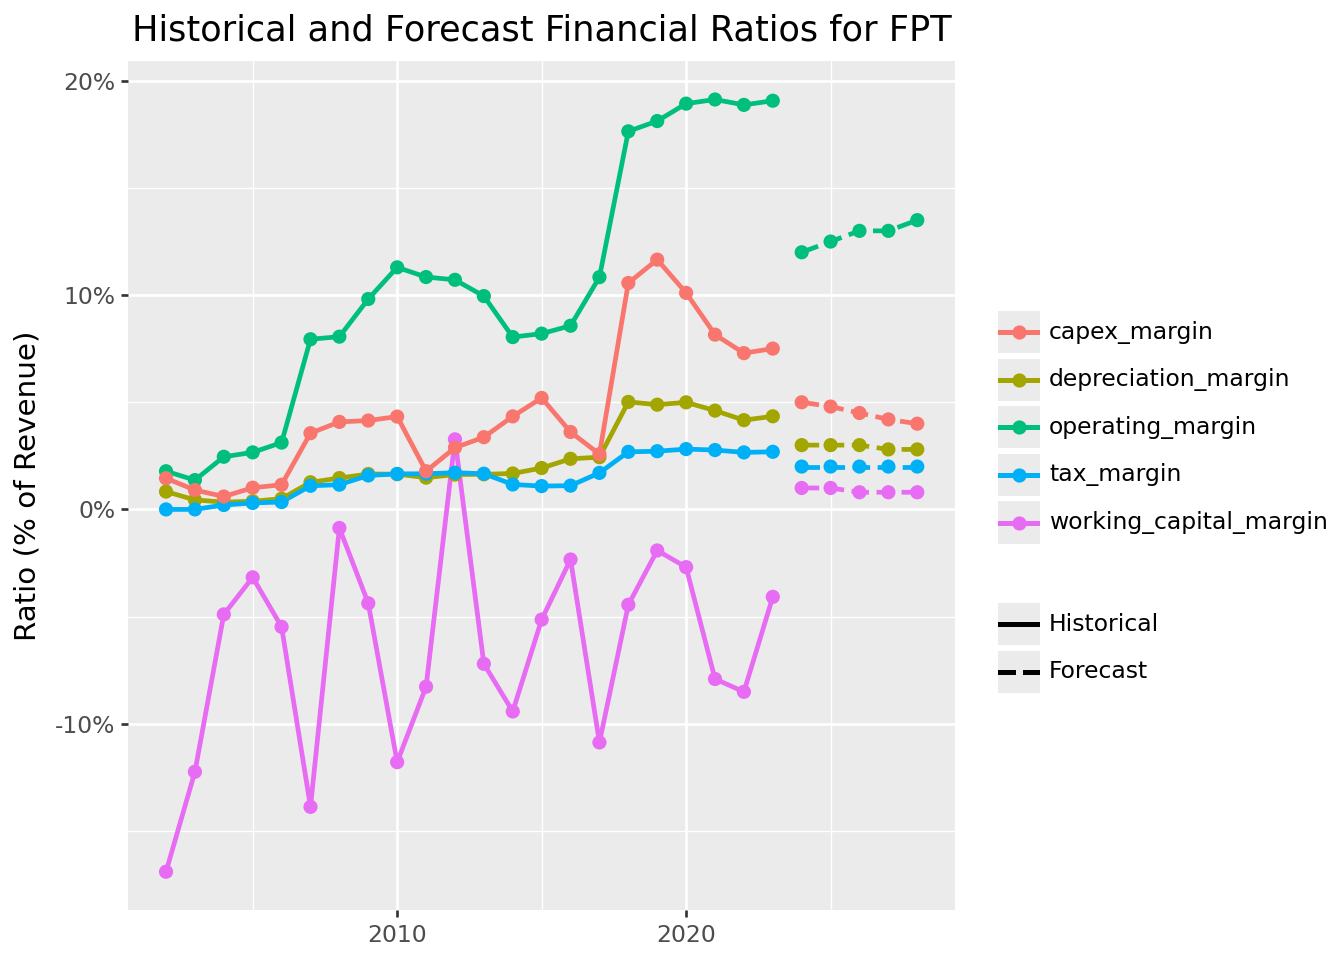

In [11]:
#| label: fig-501
#| fig-cap: Historical ratios (solid lines) and forecast assumptions (dashed lines) for key financial metrics. The forecast period begins after the last historical observation.
#| fig-alt: 'Title: Historical and forecast financial ratios for FPT. The figure shows line charts comparing historical ratios with forecast assumptions.'

# Prepare historical data for plotting
historical_plot = (historical_ratios
    .loc[:, ["year", "operating_margin", "depreciation_margin", 
             "tax_margin", "working_capital_margin", "capex_margin"]]
    .assign(type="Historical")
)

# Prepare forecast data for plotting
forecast_plot = (forecast_data
    .loc[:, ["year", "operating_margin", "depreciation_margin",
             "tax_margin", "working_capital_margin", "capex_margin"]]
    .assign(type="Forecast")
)

# Combine
combined_ratios = pd.concat([historical_plot, forecast_plot], ignore_index=True)

# Reshape for plotting
combined_long = combined_ratios.melt(
    id_vars=["year", "type"],
    var_name="ratio",
    value_name="value"
)

combined_long["type"] = pd.Categorical(
    combined_long["type"], 
    categories=["Historical", "Forecast"]
)

forecast_ratios_figure = (
    ggplot(combined_long, aes(x="year", y="value", color="ratio", linetype="type"))
    + geom_line(size=1)
    + geom_point(size=2)
    + scale_y_continuous(labels=percent_format())
    + labs(
        x="", y="Ratio (% of Revenue)", color="", linetype="",
        title="Historical and Forecast Financial Ratios for FPT"
    )
    + theme(legend_position="right")
)

forecast_ratios_figure.show()

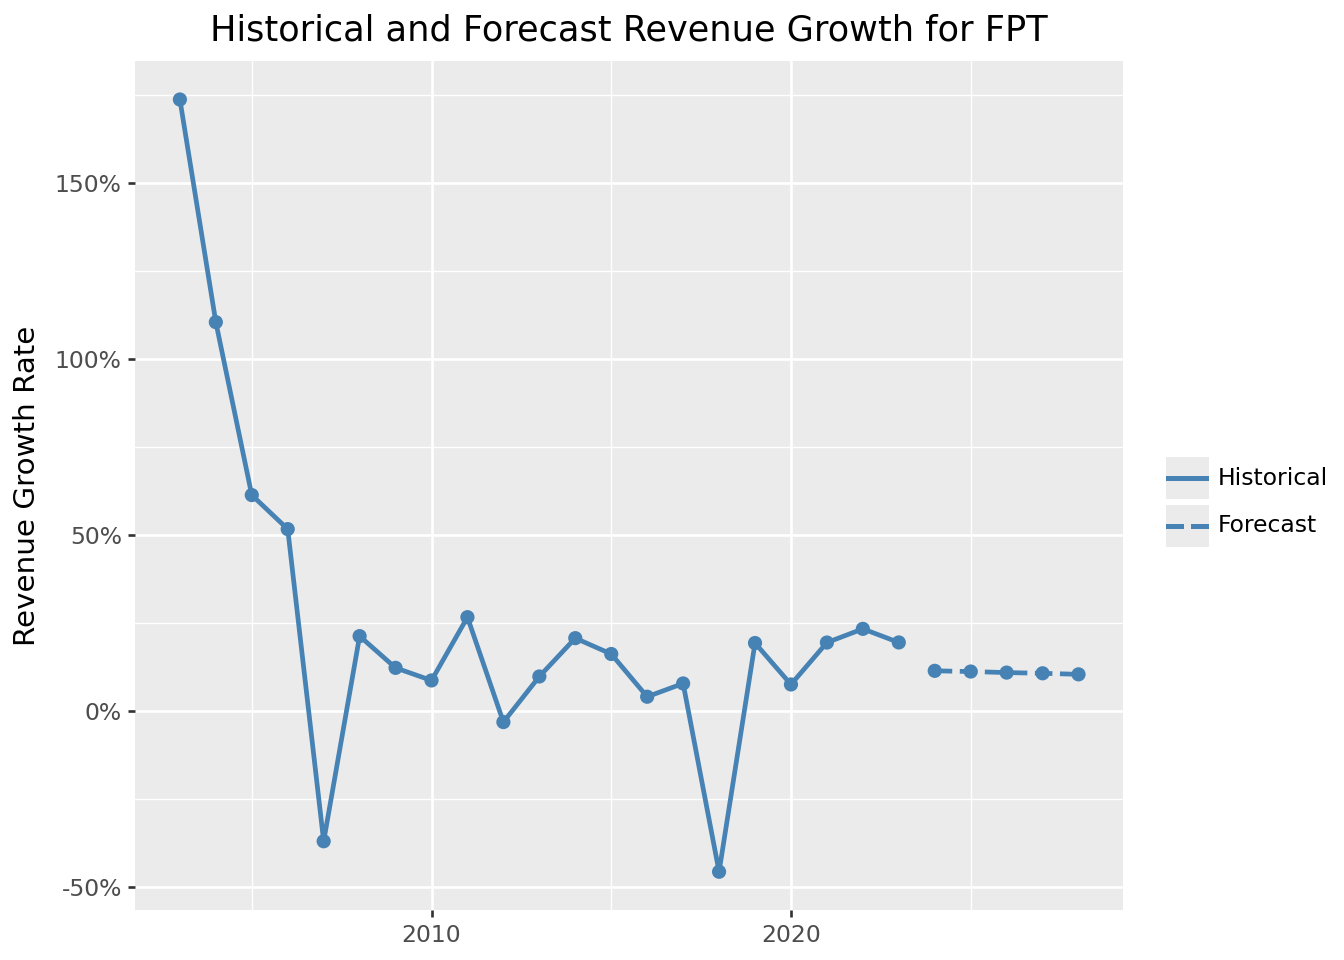

In [12]:
#| label: fig-502
#| fig-cap: 'Revenue growth rates: historical (realized) and forecast (GDP-linked with company premium). The forecast assumes FPT grows at a premium to Vietnam''s GDP growth.'
#| fig-alt: 'Title: Revenue growth rates for FPT. The figure shows historical and forecast revenue growth rates.'

# Prepare growth data
historical_growth_df = (historical_ratios
    .loc[:, ["year", "revenue_growth"]]
    .dropna()
    .assign(type="Historical")
)

forecast_growth_df = (forecast_data
    .loc[:, ["year", "revenue_growth", "gdp_growth"]]
    .assign(type="Forecast")
)

# Combine for revenue growth
growth_combined = pd.concat([
    historical_growth_df,
    forecast_growth_df[["year", "revenue_growth", "type"]]
], ignore_index=True)

growth_combined["type"] = pd.Categorical(
    growth_combined["type"],
    categories=["Historical", "Forecast"]
)

growth_figure = (
    ggplot(growth_combined, aes(x="year", y="revenue_growth", linetype="type"))
    + geom_line(size=1, color="steelblue")
    + geom_point(size=2, color="steelblue")
    + scale_y_continuous(labels=percent_format())
    + labs(
        x="", y="Revenue Growth Rate", linetype="",
        title="Historical and Forecast Revenue Growth for FPT"
    )
)

growth_figure.show()

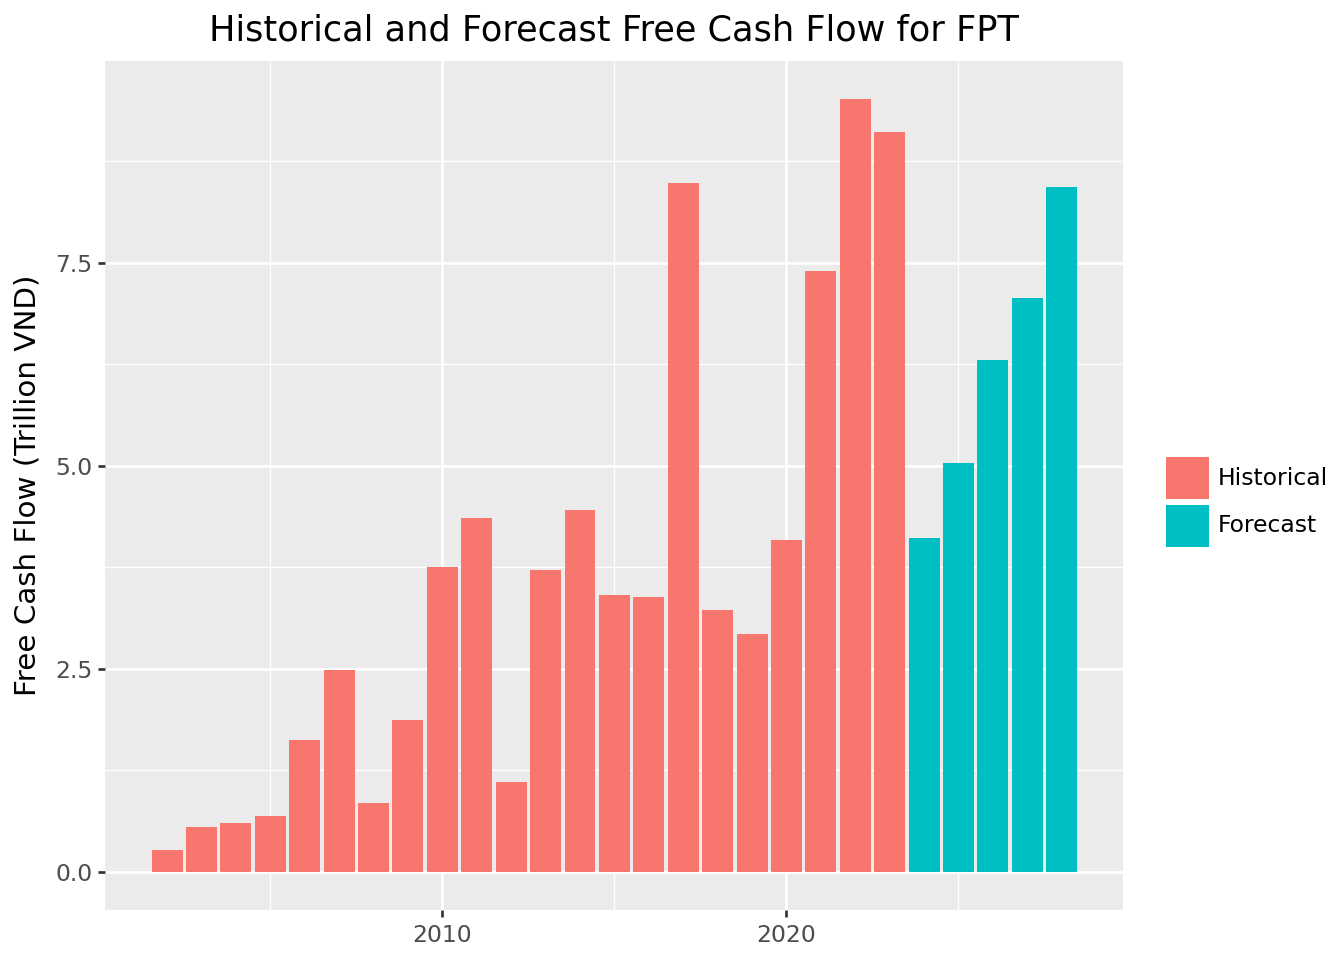

In [13]:
#| label: fig-503
#| fig-cap: 'Free Cash Flow: historical (realized) and forecast (projected). The forecast reflects our assumptions about revenue growth and operating ratios.'
#| fig-alt: 'Title: Free Cash Flow for FPT. The figure shows a bar chart with historical and forecast FCF values.'

# Combine historical and forecast FCF
fcf_historical = (historical_data
    .loc[:, ["year", "fcf"]]
    .assign(type="Historical")
)

fcf_forecast = (forecast_data
    .loc[:, ["year", "fcf"]]
    .assign(type="Forecast")
)

fcf_combined = pd.concat([fcf_historical, fcf_forecast], ignore_index=True)
fcf_combined["type"] = pd.Categorical(
    fcf_combined["type"],
    categories=["Historical", "Forecast"]
)

fcf_figure = (
    ggplot(fcf_combined, aes(x="year", y="fcf/1e12", fill="type"))
    + geom_col()
    + labs(
        x="", y="Free Cash Flow (Trillion VND)", fill="",
        title="Historical and Forecast Free Cash Flow for FPT"
    )
)

fcf_figure.show()

In [14]:
def compute_terminal_value(last_fcf, growth_rate, discount_rate):
    """
    Compute terminal value using the perpetuity growth model.
    
    Parameters:
    -----------
    last_fcf : float
        Free cash flow in the final forecast year
    growth_rate : float
        Perpetual growth rate (g)
    discount_rate : float
        Discount rate / WACC (r)
        
    Returns:
    --------
    float : Terminal value
    """
    if discount_rate <= growth_rate:
        raise ValueError("Discount rate must exceed growth rate for finite terminal value")
    
    return last_fcf * (1 + growth_rate) / (discount_rate - growth_rate)


# Example calculation
last_fcf = forecast_data["fcf"].iloc[-1]
perpetual_growth = 0.04  # 4% perpetual growth
discount_rate = 0.10     # 10% WACC (placeholder)

terminal_value = compute_terminal_value(last_fcf, perpetual_growth, discount_rate)

print(f"Last forecast FCF: {last_fcf/1e12:.2f} trillion VND")
print(f"Terminal value (at {perpetual_growth:.0%} growth, {discount_rate:.0%} WACC): {terminal_value/1e12:.1f} trillion VND")

Last forecast FCF: 8.43 trillion VND
Terminal value (at 4% growth, 10% WACC): 146.1 trillion VND


In [15]:
#| eval: false
#| label: download-damodaran-data

import requests
from pathlib import Path

# Create data directory if needed
data_dir = Path("data")
data_dir.mkdir(exist_ok=True)

# Download WACC data
wacc_url = "https://pages.stern.nyu.edu/~adamodar/pc/datasets/wacc.xls"
response = requests.get(wacc_url, timeout=30)
response.raise_for_status()
(data_dir / "damodaran_wacc.xls").write_bytes(response.content)
print("Downloaded: damodaran_wacc.xls")

# Download country risk premium data
crp_url = "https://pages.stern.nyu.edu/~adamodar/pc/datasets/ctryprem.xlsx"
response = requests.get(crp_url, timeout=30)
response.raise_for_status()
(data_dir / "damodaran_crp.xlsx").write_bytes(response.content)
print("Downloaded: damodaran_crp.xlsx")

In [16]:
#| label: read-industry-wacc

import pandas as pd

# Read local WACC data
wacc_data = pd.read_excel(
    "data/damodaran_wacc.xls", 
    sheet_name=1, 
    skiprows=18
)

# Find WACC for Computer Services
industry_wacc = wacc_data.loc[
    wacc_data["Industry Name"] == "Computer Services",
    "Cost of Capital"
].values[0]

print(f"Industry WACC (Computer Services): {industry_wacc:.2%}")

Industry WACC (Computer Services): 7.83%


In [17]:
#| label: read-country-risk-premium

# Read local country risk premium data
crp_data = pd.read_excel(
    "data/damodaran_crp.xlsx",
    sheet_name="ERPs by country",
    skiprows=7
)

# Find Vietnam's country risk premium
vietnam_row = crp_data[
    crp_data.iloc[:, 0].str.contains("Vietnam", case=False, na=False)
]

country_risk_premium = vietnam_row.iloc[0, 8]
print(f"Vietnam Country Risk Premium: {country_risk_premium:.2%}")

Vietnam Country Risk Premium: 2.09%


In [18]:
#| label: calculate-vietnam-wacc

wacc_vietnam = industry_wacc + country_risk_premium

print(f"Industry WACC (US):        {industry_wacc:.2%}")
print(f"Country Risk Premium:      {country_risk_premium:.2%}")
print(f"Adjusted WACC (Vietnam):   {wacc_vietnam:.2%}")

wacc = wacc_vietnam

Industry WACC (US):        7.83%
Country Risk Premium:      2.09%
Adjusted WACC (Vietnam):   9.92%


In [19]:
def compute_dcf_value(fcf_series, wacc, perpetual_growth):
    """
    Compute enterprise value using DCF analysis.
    
    Parameters:
    -----------
    fcf_series : array-like
        Free cash flows for forecast period
    wacc : float
        Weighted average cost of capital
    perpetual_growth : float
        Perpetual growth rate for terminal value
        
    Returns:
    --------
    dict : Components of DCF valuation
    """
    fcf = np.array(fcf_series)
    n_years = len(fcf)
    
    # Discount factors
    discount_factors = (1 + wacc) ** np.arange(1, n_years + 1)
    
    # Present value of forecast period cash flows
    pv_fcf = fcf / discount_factors
    pv_fcf_total = pv_fcf.sum()
    
    # Terminal value and its present value
    terminal_value = compute_terminal_value(fcf[-1], perpetual_growth, wacc)
    pv_terminal = terminal_value / discount_factors[-1]
    
    # Total enterprise value
    enterprise_value = pv_fcf_total + pv_terminal
    
    return {
        "pv_fcf": pv_fcf_total,
        "terminal_value": terminal_value,
        "pv_terminal": pv_terminal,
        "enterprise_value": enterprise_value,
        "terminal_pct": pv_terminal / enterprise_value
    }


# Compute DCF value
perpetual_growth = 0.04  # 4% perpetual growth

dcf_result = compute_dcf_value(
    fcf_series=forecast_data["fcf"].values,
    wacc=wacc,
    perpetual_growth=perpetual_growth
)

print("DCF Valuation Results")
print("=" * 50)
print(f"PV of Forecast Period FCF: {dcf_result['pv_fcf']/1e12:.1f} trillion VND")
print(f"Terminal Value: {dcf_result['terminal_value']/1e12:.1f} trillion VND")
print(f"PV of Terminal Value: {dcf_result['pv_terminal']/1e12:.1f} trillion VND")
print(f"Enterprise Value: {dcf_result['enterprise_value']/1e12:.1f} trillion VND")
print(f"Terminal Value as % of EV: {dcf_result['terminal_pct']:.1%}")

DCF Valuation Results
PV of Forecast Period FCF: 22.7 trillion VND
Terminal Value: 148.1 trillion VND
PV of Terminal Value: 92.3 trillion VND
Enterprise Value: 115.1 trillion VND
Terminal Value as % of EV: 80.2%


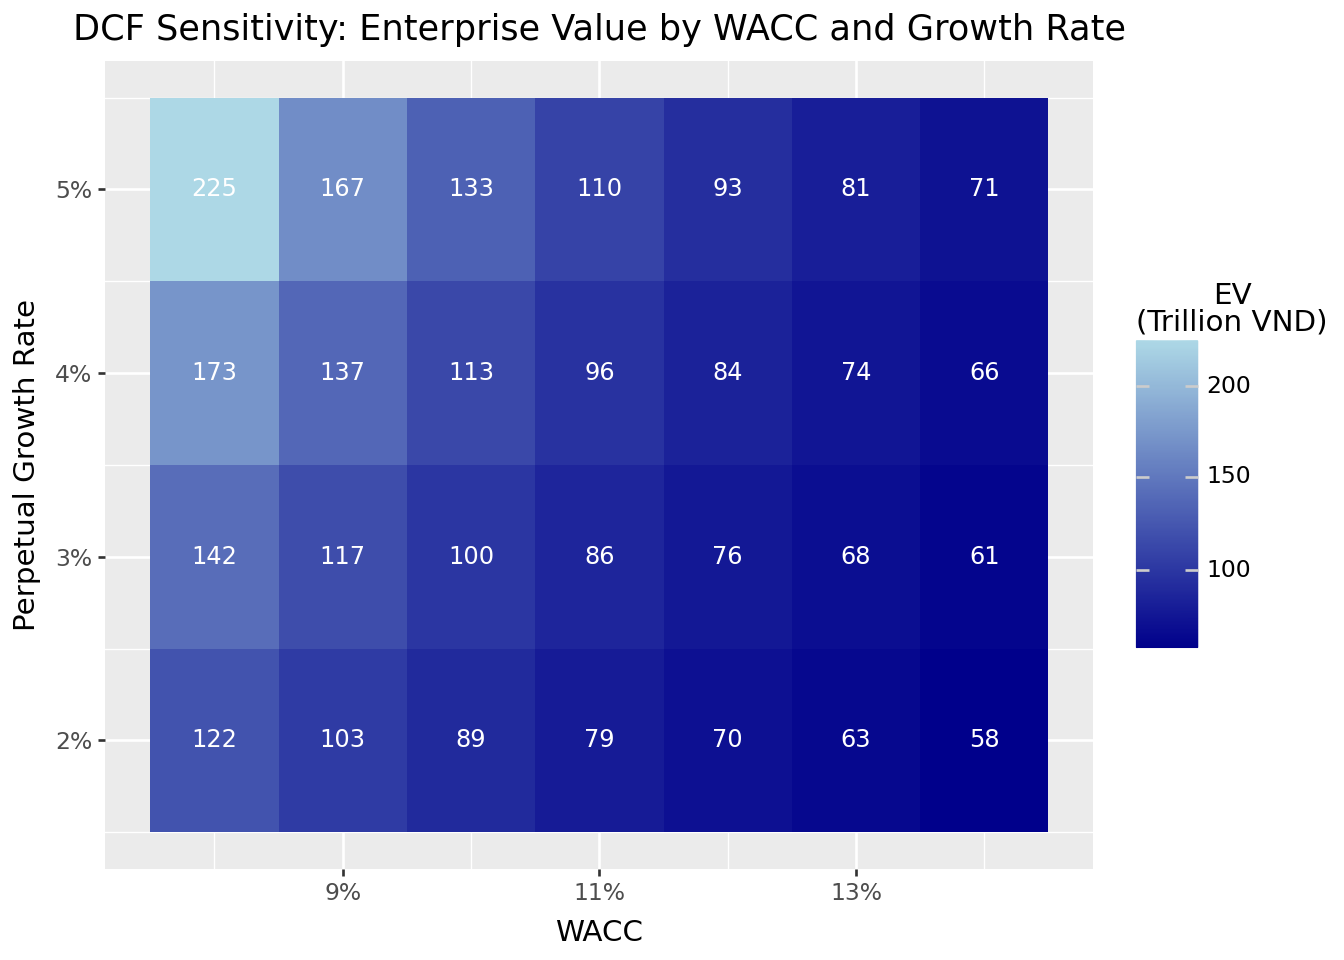

In [20]:
#| label: fig-504
#| fig-cap: Sensitivity of enterprise value to WACC and perpetual growth rate assumptions. Small changes in these inputs can substantially affect valuation.
#| fig-alt: 'Title: DCF Sensitivity Analysis. The figure shows a heatmap of enterprise values for different combinations of WACC and growth rate.'

# Define ranges for sensitivity analysis
wacc_range = np.arange(0.08, 0.14, 0.01)  # 8% to 13%
growth_range = np.arange(0.02, 0.06, 0.01)  # 2% to 5%

# Create all combinations
sensitivity_results = []

for w in wacc_range:
    for g in growth_range:
        if w > g:  # Must have WACC > growth for valid terminal value
            result = compute_dcf_value(
                fcf_series=forecast_data["fcf"].values,
                wacc=w,
                perpetual_growth=g
            )
            sensitivity_results.append({
                "wacc": w,
                "growth_rate": g,
                "enterprise_value": result["enterprise_value"] / 1e12  # In trillions
            })

sensitivity_df = pd.DataFrame(sensitivity_results)

# Create heatmap
sensitivity_figure = (
    ggplot(sensitivity_df, aes(x="wacc", y="growth_rate", fill="enterprise_value"))
    + geom_tile()
    + geom_text(
        aes(label="enterprise_value"),
        format_string="{:.0f}",
        color="white",
        size=9
    )
    + scale_x_continuous(labels=percent_format())
    + scale_y_continuous(labels=percent_format())
    + scale_fill_gradient(low="darkblue", high="lightblue")
    + labs(
        x="WACC", y="Perpetual Growth Rate",
        fill="EV\n(Trillion VND)",
        title="DCF Sensitivity: Enterprise Value by WACC and Growth Rate"
    )
)

sensitivity_figure.show()

In [21]:
# Get most recent balance sheet data for FPT
latest_year = fpt_data["year"].max()
latest_data = fpt_data[fpt_data["year"] == latest_year].iloc[0]

# Extract debt and cash (column names may vary)
total_debt = latest_data.get("total_debt", 0)
cash = latest_data.get("ca_cce", 0)

# Compute equity value
enterprise_value = dcf_result["enterprise_value"]
equity_value = enterprise_value - total_debt + cash

print("From Enterprise Value to Equity Value")
print("=" * 50)
print(f"Enterprise Value: {enterprise_value/1e12:.1f} trillion VND")
print(f"Less: Total Debt: {total_debt/1e12:.1f} trillion VND")
print(f"Plus: Cash: {cash/1e12:.1f} trillion VND")
print(f"Equity Value: {equity_value/1e12:.1f} trillion VND")

From Enterprise Value to Equity Value
Enterprise Value: 115.1 trillion VND
Less: Total Debt: 0.0 trillion VND
Plus: Cash: 8.3 trillion VND
Equity Value: 123.3 trillion VND


In [22]:
# Get shares outstanding (this would come from market data)
# Using placeholder - in practice, get from exchange data
shares_outstanding = latest_data.get("total_equity", equity_value) / 25000  # Rough estimate

implied_price = equity_value / shares_outstanding

print(f"\nImplied Share Price: {implied_price:,.0f} VND")


Implied Share Price: 103,008 VND
